# Author: Ashwin Nair
### The Spark Foundation

### Task 1: Basic Linear Regression Model

### Problem Statement: Predict the percentage of a student based on the number of study hours.
###                                 What will be the predicted score if the student studies for 9.25 hrs/day?


#### Importing Libraries

In [150]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
%matplotlib inline

#### Loading our dataset

In [152]:
link='https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv'
data=pd.read_csv(link)

#### Quick overview of dataset

In [153]:
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [154]:
data.shape

(25, 2)

In [157]:
#to display basic info about the datatype
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [155]:
# To display stats about our dataset
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### Preprocessing our data

In [13]:
# Checking the total number of null values in each column
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

### Exploratory Data analysis on our data set

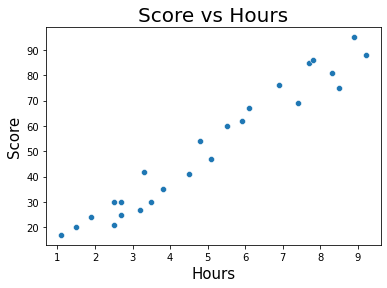

In [14]:
sns.scatterplot(x=data['Hours'],y=data['Scores'])
plt.xlabel('Hours',size=15)
plt.ylabel('Score',size=15)
plt.title('Score vs Hours',size=20)
plt.show()

In [9]:
data.corr() #Correlation coefficient

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [136]:
#Spliiting Data for Training and Testing
x=data.drop('Scores',axis='columns')
y=data.drop('Hours',axis='columns')
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [137]:
#Checking the Dimensions our split data
print('Shape of X Train:',x_train.shape[0])
print('Shape of Y Train:',y_train.shape[0])
print('Shape of X Test:',x_test.shape[0])
print('Shape of Y Test:',y_test.shape[0])

Shape of X Train: 20
Shape of Y Train: 20
Shape of X Test: 5
Shape of Y Test: 5


### Selecting a model and Training it
From our scatter plot we could infer that our 2 variables have linear realtionship. Hence we could use Linear Regression model

In [138]:
#Build Linear Regression model
lm=linear_model.LinearRegression()
model=lm.fit(x_train,y_train)

In [139]:
m=model.coef_
print('Slope(m) for our regression line is:',m)

Slope(m) for our regression line is: [[9.68207815]]


In [140]:
c=model.intercept_
print('Intercept c for our regression line is:',c)

Intercept c for our regression line is: [2.82689235]


In [141]:
print(f'Equation of our regression line is: y={m}x+{c}')


Equation of our regression line is: y=[[9.68207815]]x+[2.82689235]


In [142]:
y_pred=lm.predict(x_test)

In [143]:
pd.DataFrame(np.c_[x_test,y_test,y_pred],columns=['Hours','Actual Score','Predicted Score'])

,Hours,Actual Score,Predicted Score
0,8.3,81.0,83.188141
1,2.5,30.0,27.032088
2,2.5,21.0,27.032088
3,6.9,76.0,69.633232
4,5.9,62.0,59.951153


 ### Evaluate the model

In [144]:
model.score(x_test,y_test) 

0.9678055545167994

In [149]:
#Predict new vlaue of score
New_hours=9.25
Score_predict=model.predict([[New_hours]])
print('For a student who studies for 9.25 hrs/day, Predicted score is:',Score_predict)

For a student who studies for 9.25 hrs/day, Predicted score is: [[92.38611528]]


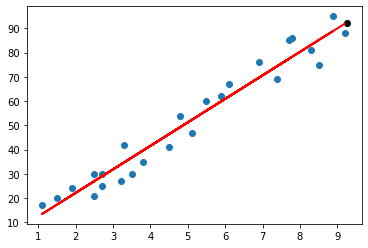

In [158]:
#Plotting the regression line
plt.scatter(x,y)
plt.plot(x_train,model.predict(x_train),color='red',linewidth=2)
#Plotting thepredicted score for 9.25 hr/day student
plt.scatter(New_hours,Score_predict,color='black')